# Soal 10

1. [Buang missing data dan log transform salaries](#1)
2. [Buat training dan test set](#2)
3. [Lakukan boosting untuk 1000 trees](#3)
4. [Plot MSE](#4)
5. [Bandingkan MSE boosting sama model yang lain](#5)
6. [Varibel mana yang paling penting (vote terbanyak)](#6)
7. [Lakukan bagging ke training set](#7)

## 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import BaggingRegressor

%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/Hitters.csv')

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [5]:
df.shape

(322, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 50.4+ KB


In [7]:
df = pd.get_dummies(df)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,NaN,1,0,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1


In [8]:
df = df.dropna(subset=['Salary'])

In [9]:
df.shape

(263, 23)

In [10]:
df['Salary'] = np.log(df['Salary'])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,6.163315,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,6.173786,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,6.214608,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,4.516339,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,6.620073,1,0,0,1,1,0


[kembali ke atas](#Soal-10)

## 2

In [11]:
# buat training set untuk 200 observasi pertama
X = df.drop(['Salary'], axis=1) # ambil kolom selain Salary
Y = df['Salary'] # Hanya ambil Salary

In [12]:
# training set
# ambil 200 baris pertama
# ambil semua kolom di X
X_train = X.iloc[:200, :]
Y_train = Y.iloc[:200]
# test set
# ambil semua baris dari baris ke 201
# ambil semua kolom di X
X_test = X.iloc[200:, :]
Y_test = Y.iloc[200:]

In [13]:
# cek shapenya
X_train.shape

(200, 22)

In [14]:
X_test.shape

(63, 22)

In [15]:
Y_test.shape

(63,)

Dataset sudah betul

[kembali ke atas](#Soal-10)

## 3

In [16]:
λ = [0.001, 0.0025, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5]
mse = []

In [17]:
for i in λ:
    Boosting = GradientBoostingRegressor(learning_rate=i, n_estimators=1000, random_state=1)
    Boosting.fit(X_train, Y_train)
    prediksi = Boosting.predict(X_train)
    mse.append(mean_squared_error(Y_train, prediksi))

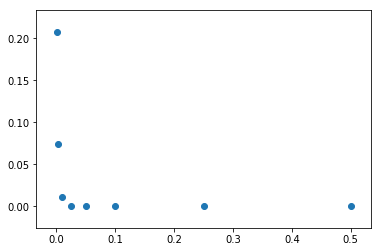

In [18]:
plt.scatter(λ, mse)

[kembali ke atas](#Soal-10)

## 4

In [19]:
# test set
mse_test = []
for i in λ:
    Boosting = GradientBoostingRegressor(learning_rate=i, n_estimators=1000, random_state=1)
    Boosting.fit(X_train, Y_train)
    prediksi = Boosting.predict(X_test)
    mse_test.append(mean_squared_error(Y_test, prediksi))

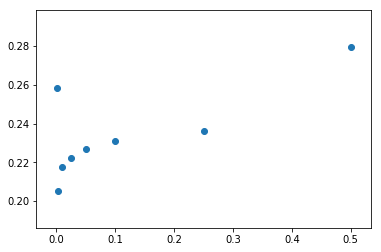

In [20]:
plt.scatter(λ, mse_test)

[kembali ke atas](#Soal-10)

## 5

In [21]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
mean_squared_error(Y_test, LR.predict(X_test))

0.4917959375454915

In [22]:
Lasso = LassoCV(cv=10)
Lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, Lasso.predict(X_test))

0.4865863696030246

In [23]:
min_value = min(mse_test)

In [24]:
min_value

0.20508403951292378

In [25]:
min_index = mse_test.index(min_value)
min_index

1

In [26]:
mse_test

[0.258269353005984,
 0.20508403951292378,
 0.21776782266560096,
 0.22239014963537712,
 0.22702442992620783,
 0.23075957918990808,
 0.23615456772062865,
 0.27957581770438006]

accuracynya jauh berbeda, Boosting unggul jauh

[kembali ke atas](#Soal-10)

## 6

In [27]:
# dengan cara yang smaa dengan nomor 8
min_index_lambda = λ[1]
min_index_lambda

0.0025

In [28]:
Boosting = GradientBoostingRegressor(learning_rate=0.005) 
Boosting.fit(X_train, Y_train)
importance = pd.Series(Boosting.feature_importances_*100, index=X.columns)

Text(0.5, 0, 'Variable importance')

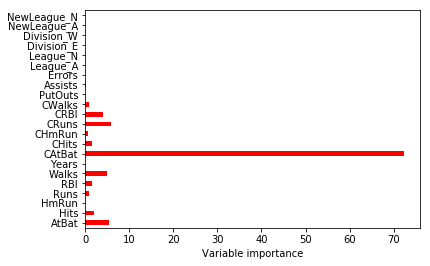

In [29]:
importance.T.plot(kind='barh', color='r')
plt.xlabel('Variable importance')

[kembali ke atas](#Soal-10)

## 7

In [30]:
Bagging = BaggingRegressor()
Bagging.fit(X_train, Y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [31]:
mean_squared_error(Y_test, Bagging.predict(X_test))

0.28858704502680743

[kembali ke atas](#Soal-10)